<a href="https://colab.research.google.com/github/ZcePing404/skincare_sentiment_analysis/blob/master/skincare_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source the dataset files from kaggle

In [ ]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadyinky/sephora-products-and-skincare-reviews")

print("Path to dataset files:", path)

dataset_dir = "/dataset"
src_path = "/kaggle/input/sephora-products-and-skincare-reviews/*"

if os.path.exists(dataset_dir):
    print("Folder already exists. Skipping mkdir and copy.")
    !cp $src_path* $dataset_dir
    print("Dataset copied to /dataset.")

else:
    print("Folder not found. Creating and copying dataset...")
    os.makedirs(dataset_dir, exist_ok=True)

    !cp $src_path* $dataset_dir
    print("Dataset copied to /dataset.")

Using Colab cache for faster access to the 'sephora-products-and-skincare-reviews' dataset.
Path to dataset files: /kaggle/input/sephora-products-and-skincare-reviews
Folder already exists. Skipping mkdir and copy.
Dataset copied to /dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Combine dataset files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

product_info_path = os.path.join(path, "product_info.csv")
df_product_info = pd.read_csv(product_info_path)
df_reviews_0_250 = pd.read_csv(os.path.join(path, "reviews_0-250.csv"))
df_reviews_250_500 = pd.read_csv(os.path.join(path, "reviews_250-500.csv"))
df_reviews_500_750 = pd.read_csv(os.path.join(path, "reviews_500-750.csv"))
df_reviews_750_1250 = pd.read_csv(os.path.join(path, "reviews_750-1250.csv"))
df_reviews_1250_end = pd.read_csv(os.path.join(path, "reviews_1250-end.csv"))

/tmp/ipython-input-1328956371.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_0_250 = pd.read_csv(os.path.join(path, "reviews_0-250.csv"))
/tmp/ipython-input-1328956371.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_750_1250 = pd.read_csv(os.path.join(path, "reviews_750-1250.csv"))
/tmp/ipython-input-1328956371.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_1250_end = pd.read_csv(os.path.join(path, "reviews_1250-end.csv"))


# Explarotary Data Analysis

## Data checking

In [ ]:
df_product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
review_chunks = [
    df_reviews_0_250,
    df_reviews_250_500,
    df_reviews_500_750,
    df_reviews_750_1250,
    df_reviews_1250_end
]

df_all_reviews = pd.concat(review_chunks, ignore_index=True)

print(f"Total number of review chunks combined: {len(review_chunks)}")
print(f"Shape of the final combined DataFrame (Rows, Columns): {df_all_reviews.shape}")

Total number of review chunks combined: 5
Shape of the final combined DataFrame (Rows, Columns): (1094411, 19)


## Head of combined dataframe

In [ ]:
df_all_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
df_all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

# Data preprocessing

<Figure size 2500x2000 with 0 Axes>

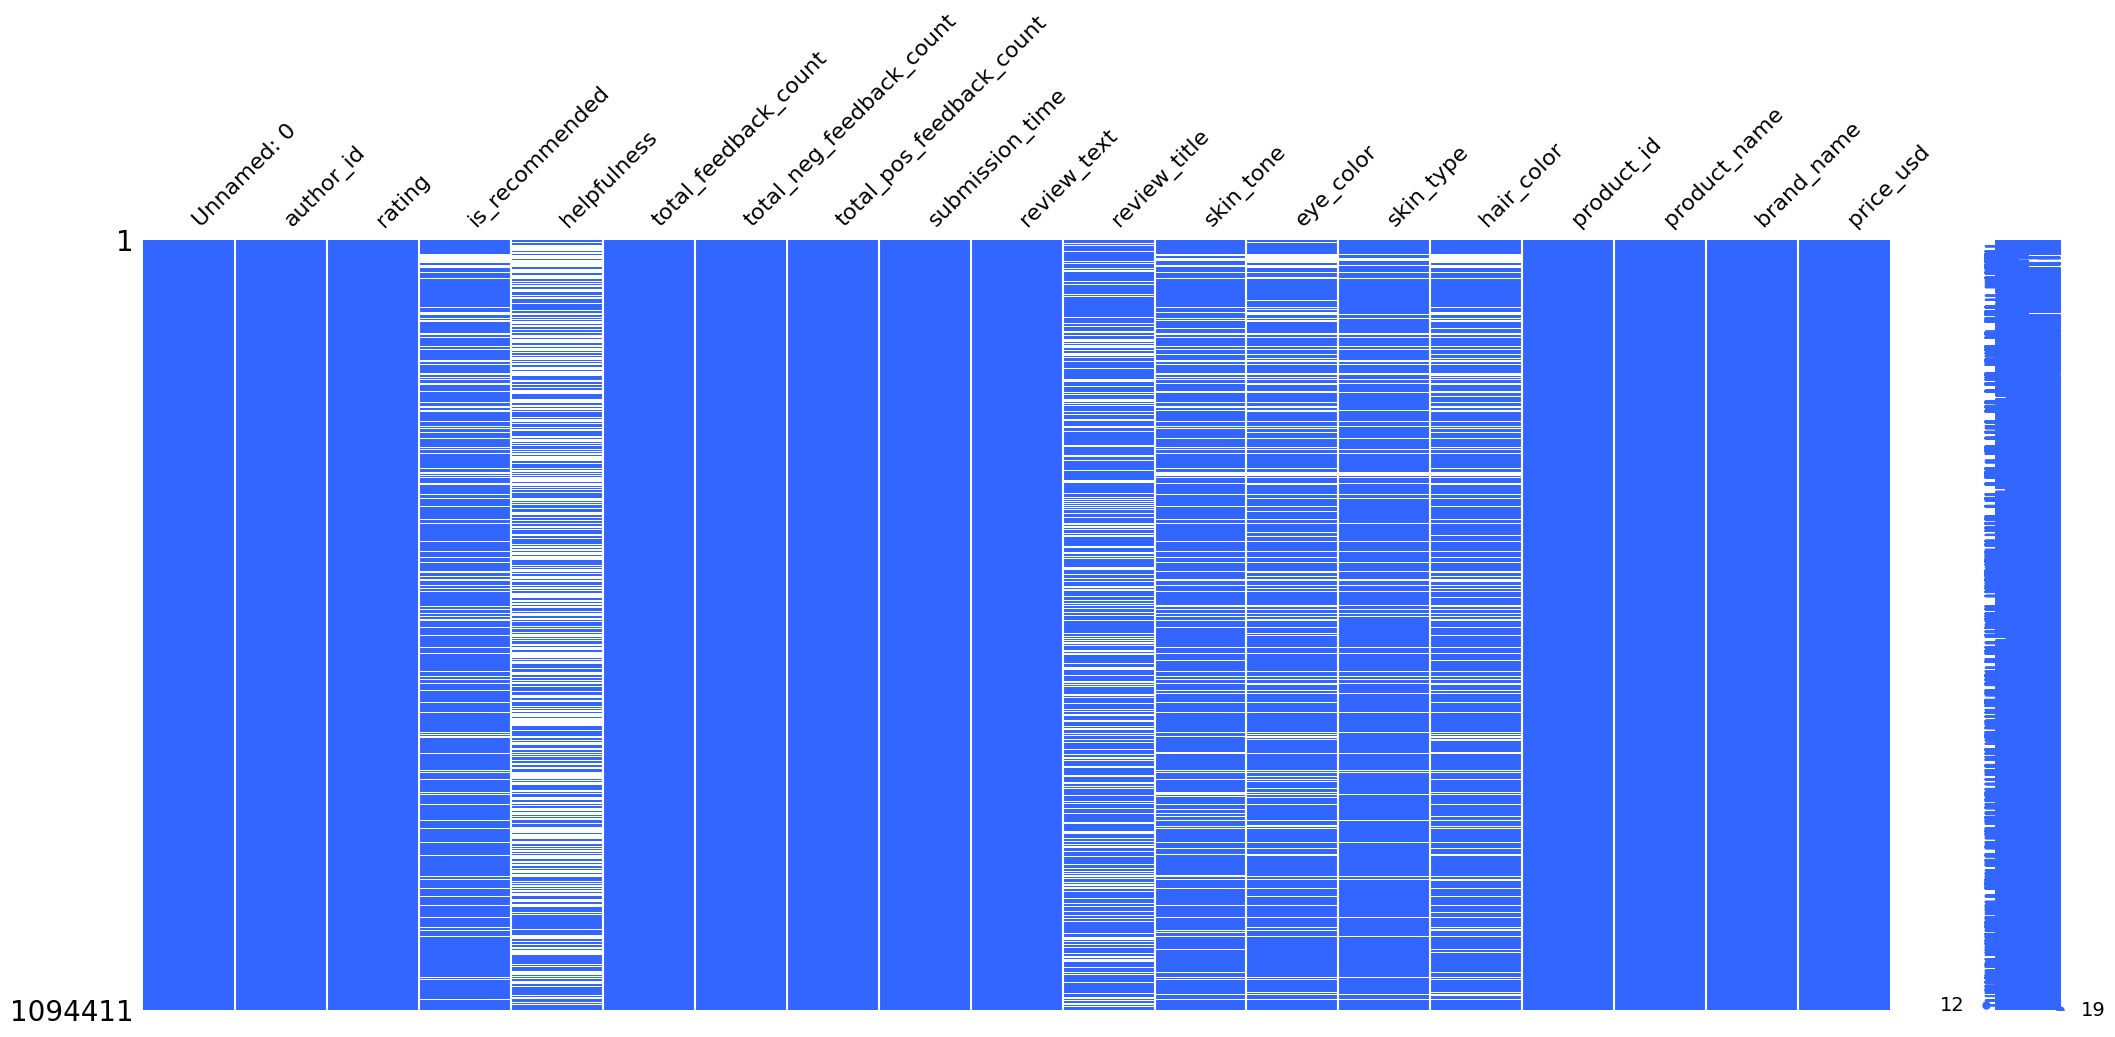

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df_all_reviews, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
df_all_reviews.dropna(inplace=True, subset=['review_text'])
df_all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092967 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1092967 non-null  int64  
 1   author_id                 1092967 non-null  object 
 2   rating                    1092967 non-null  int64  
 3   is_recommended            924979 non-null   float64
 4   helpfulness               532372 non-null   float64
 5   total_feedback_count      1092967 non-null  int64  
 6   total_neg_feedback_count  1092967 non-null  int64  
 7   total_pos_feedback_count  1092967 non-null  int64  
 8   submission_time           1092967 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 922468 non-null   object 
 12  eye_color                 883401 non-null   object 
 13  skin_type                 981449

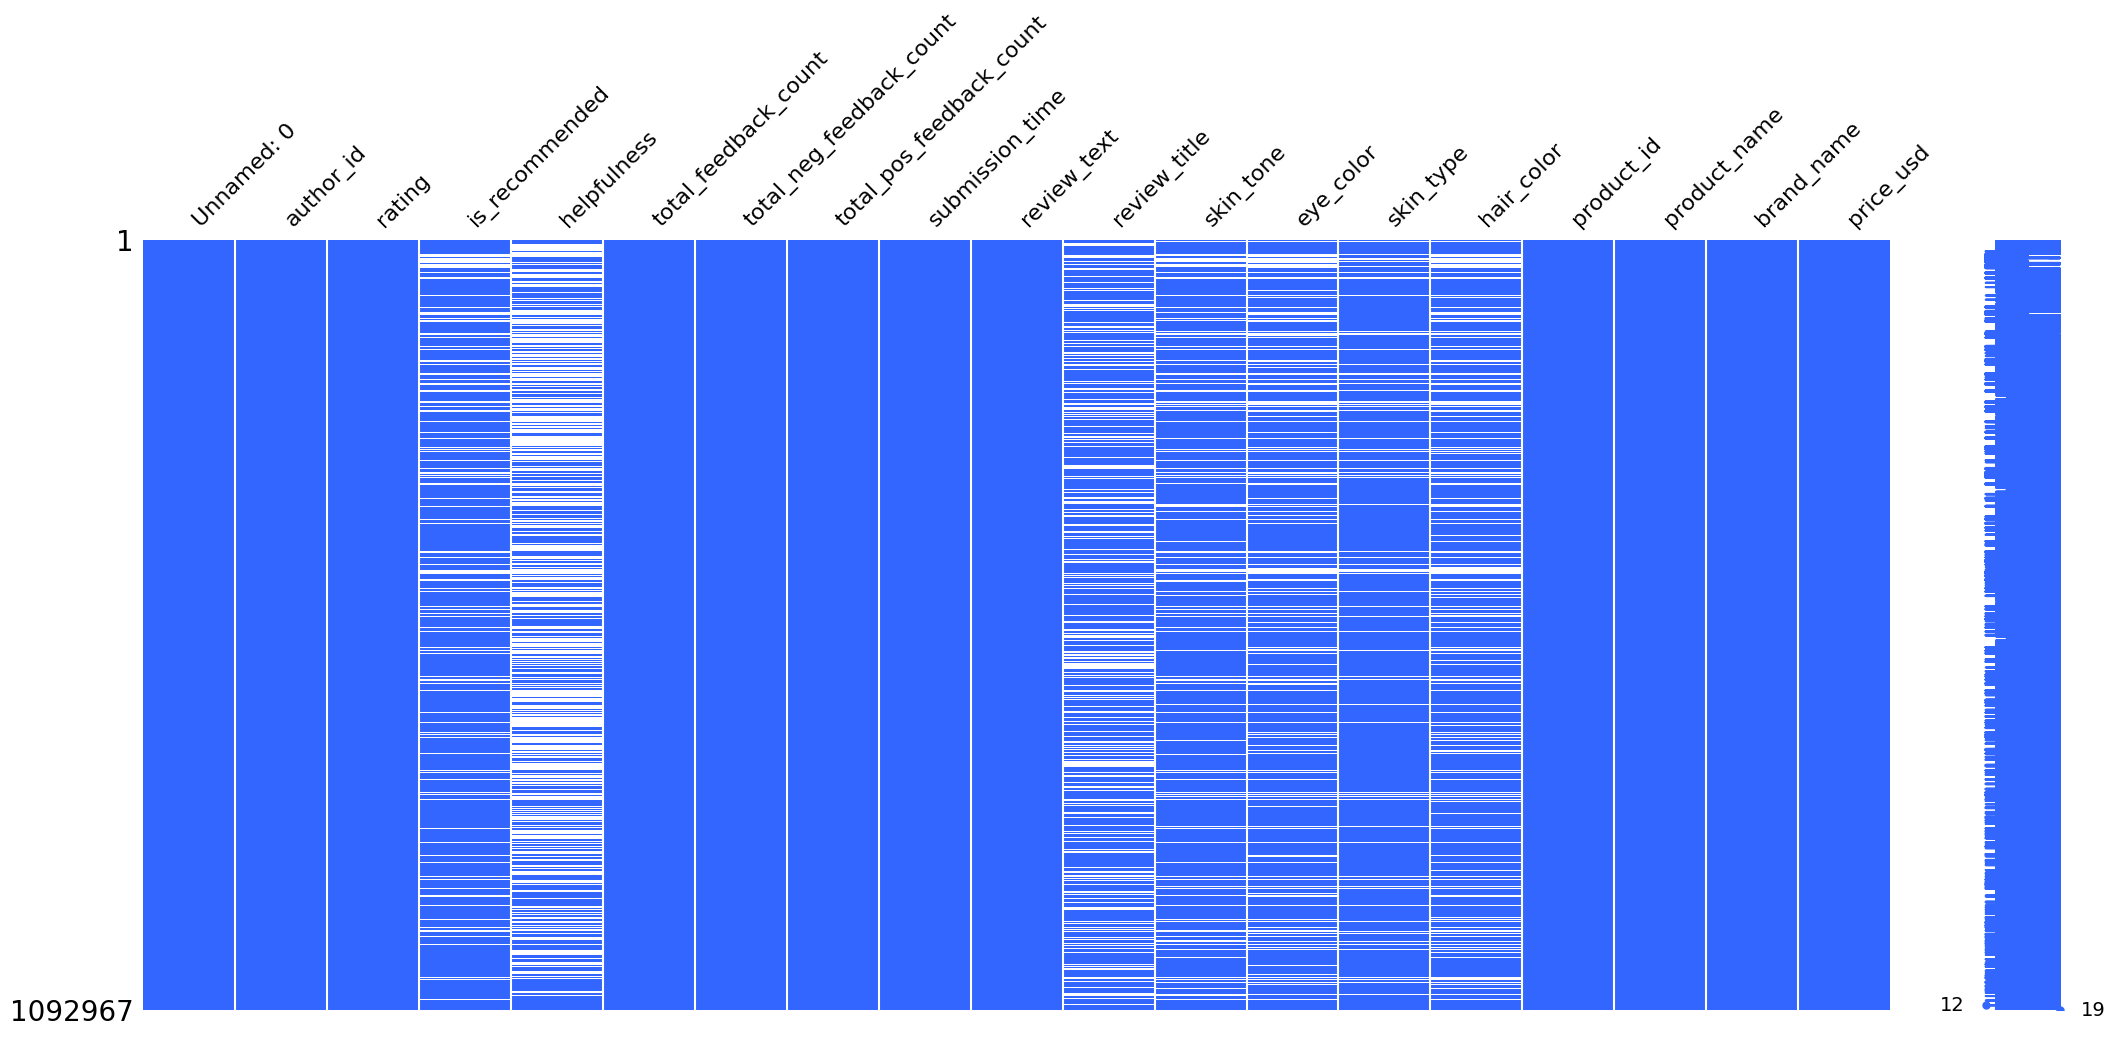

In [ ]:
msno.matrix(df_all_reviews, color=[0.2, 0.4, 1])
plt.show()

## Text Cleaning

In [ ]:
import re

# Remove URL
def remove_urls(text):
  text = re.sub(r"https\S+", "", text)
  return text

In [ ]:
import unicodedata as uni

# Normalize Unicode
def unicode_normalize(text):
  return uni.normalize('NFKD', text)


In [ ]:
!pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
import demoji

# Clean emoji into text
def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


In [ ]:
!pip install textblob
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.6 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker

def correct_spelling(text):
  spell = SpellChecker()
  new_text = ""
  for word in text.split():
    if word[0].isupper():
      new_text = new_text + word + " "       #for capitalize words for names
    else:
      corrected_word = spell.correction(word)
      new_text = new_text + (corrected_word if corrected_word is not None else word) + " "

  return new_text

In [ ]:
import regex as re

# Remove unuseful space like " Hello   Good Morning. "
def remove_doublespaces(text):
  return " ".join(text.split())

def remove_special_chararcters(text):
  return re.sub(r"[^\w\s]", "", text)

## Text pre-processing

In [ ]:
df_all_reviews['combined_text'] = df_all_reviews['review_title'].fillna("") + " " + df_all_reviews['review_text'].fillna("")

df_all_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,combined_text
0,0,1741593524,5,1.0,1.000000,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Taught me how to double cleanse! I use this wi...
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Disappointed I bought this lip mask after read...
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,New Favorite Routine My review title says it a...
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Can't go wrong with any of them I’ve always lo...
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,"A must have !!! If you have dry cracked lips, ..."
5,5,42802569154,4,1.0,1.000000,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Great! The scent isn’t my favourite but it wor...
6,6,6941883808,2,0.0,0.250000,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Dried my lips out and clogged my pores I’ll gi...
7,7,27926227988,5,1.0,NaN,0,0,0,2023-03-19,I use this at night or while I’m putting makeu...,Works great,fairLight,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Works great I use this at night or while I’m p...
8,8,7656791726,5,1.0,1.000000,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Must have. I love this stuff. I first had the ...
9,9,38727834382,5,1.0,1.000000,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,RUN TO PURCHASE I purchased the Sweet Candy sc...


In [ ]:
!pip install nltk

In [ ]:
import spacy
sp = spacy.load("en_core_web_sm")

def word_tokenizer(text):
  text = text.lower()
  return text.split()

def lemmatization(text):
  text = " ".join(text)
  token = sp(text)

  text = [word.lemma_ for word in token]
  return text

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

en_stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
  return [word for word in text if word not in en_stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.snowball import SnowballStemmer

def stemming(text):
  stemmer = SnowballStemmer("english")
  return [stemmer.stem(word) for word in text]

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=857e5847f5519bfd425e07c68d8c6c54201decc802147c9eb01a8dc200192b18
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [ ]:
!pip install googletrans

In [ ]:
from googletrans import Translator
import asyncio # Import asyncio for running async functions


async def translate_text(text, dest_lang='en'):
    translator = Translator()
    # Await the translate method as it returns a coroutine
    translated = ""
    for word in text.split():
      translated = translated + (await translator.translate(word, dest=dest_lang)).text + " "

    return translated



In [ ]:
def preprocess_before_translate(text):
  text = remove_urls(text)
  text = unicode_normalize(text)
  text = handle_emoji(text)
  text = remove_doublespaces(text)
  text = remove_special_chararcters(text)

  text = correct_spelling(text)
  text = word_tokenizer(text)
  text = lemmatization(text)
  text = [word.lower() for word in text]
  text = remove_stopwords(text)
  return text

In [ ]:
# df_all_reviews.to_csv('cleaned_reviews.csv', index=False)

In [ ]:
def preprocess_after_translate(text):
  text = correct_spelling(text)
  text = word_tokenizer(text)
  text = lemmatization(text)
  text = [word.lower() for word in text]
  text = remove_stopwords(text)
  return text

In [ ]:
## Can use df_all_reviews for the entire dataset

dfSubset['combined_text'] = preprocess_before_translate(dfSubset['combined_text'])
dfSubset['afterProcess'] = dfSubset['combined_text'].apply(preprocess_after_translate)

dfSubset.head()

/tmp/ipython-input-3945925796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSubset['combined_text'] = preprocess_before_translate(dfSubset['combined_text'])
/tmp/ipython-input-3945925796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSubset['afterProcess'] = dfSubset['combined_text'].apply(preprocess_after_translate)


,review_title,review_text,combined_text,afterProcess
0,Taught me how to double cleanse!,I use this with the Nudestix “Citrus Clean Bal...,taught me how to double cleanse i use this wit...,"[teach, I, double, cleanse, I, use, nude, citr..."
1,Disappointed,I bought this lip mask after reading the revie...,disappointed i bought this lip mask after read...,"[disappoint, I, buy, lip, mask, read, review, ..."
2,New Favorite Routine,My review title says it all! I get so excited ...,new favorite routine my review title says it a...,"[new, favorite, routine, review, title, say, I..."
3,Can't go wrong with any of them,I’ve always loved this formula for a long time...,cant go wrong with any of them ive always love...,"[go, wrong, give, always, love, formula, long,..."
4,A must have !!!,"If you have dry cracked lips, this is a must h...",a must have if you have dry cracked lips this...,"[must, dry, crack, lip, must, week, use, I, le..."


## Label y

In [ ]:
def label(rating):
    if rating >= 4:
        return 2
    elif rating <= 2:
        return 0
    else:
        return 1

## Preprocess

In [ ]:
from tqdm import tqdm

sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 https:kaggle.com/ankit_gupta/12321fd 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 ,.!𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠k"

selectedColumns = df_all_reviews[['review_title', 'review_text', 'rating']]
dfSubset = selectedColumns.sample(n=10000)
dfSubset['combined_text'] = dfSubset['review_title'].fillna("") + " " + dfSubset['review_text'].fillna("")
dfSubset['y'] = dfSubset.rating.apply(label)

clean_df = pd.DataFrame()

clean_texts = []
for text in tqdm((dfSubset["combined_text"]), desc=f"Preprocess...",leave=True):
  cleaned_text = preprocess_before_translate(text)
  clean_texts.append(cleaned_text)


clean_df['y'] = dfSubset['y']
clean_df['review_title'] = dfSubset['review_title']
clean_df['review_text'] = dfSubset['review_text']
clean_df['clean_text'] = clean_texts
clean_df.head(10)


# translated_text = await translate_text(cleaned_text)
# cleaned_text = preprocess_after_translate(translated_text)




Preprocess...:  46%|████▌     | 4561/10000 [59:57<1:53:52,  1.26s/it]